<a href="https://colab.research.google.com/github/sanjanb/Pranayama-reduces-BP-or-Not/blob/main/Complete_Pranayama_Process_%5Bafter_resampled_dataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do pranayama really helps to reduce BP**

## **Data loading**

Load the data from "resampled_data.csv" into a pandas DataFrame.


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('resampled_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'resampled_data.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Systolic BP,Diastolic BP,Sex_Men,Sex_Women,Pranayama
0,126.402570,78.688567,True,False,0
1,122.895711,76.855848,False,True,0
2,118.000000,77.000000,False,True,1
3,161.500000,77.500000,True,False,1
4,126.000000,73.000000,True,False,1


(264, 5)


## **Data exploration**

Explore the dataset to understand its structure, including the shape of the data, the distribution of variables (especially blood pressure and any potential features related to pranayama practice), and identify potential correlations between variables. Check for missing values and data types.


,Systolic BP,Diastolic BP,Pranayama
count,264.000000,264.000000,264.000000
mean,125.422383,77.453524,0.242424
std,7.168831,3.784959,0.429364
min,99.000000,60.333333,0.000000
25%,123.558709,77.151692,0.000000
50%,124.671023,77.688472,0.000000
75%,125.915705,78.334226,0.000000
max,180.000000,97.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Systolic BP   264 non-null    float64
 1   Diastolic BP  264 non-null    float64
 2   Sex_Men       264 non-null    bool   
 3   Sex_Women     264 non-null    bool   
 4   Pranayama     264 non-null    int64  
dtypes: bool(2), float64(2), int64(1)
memory usage: 6.8 KB


None

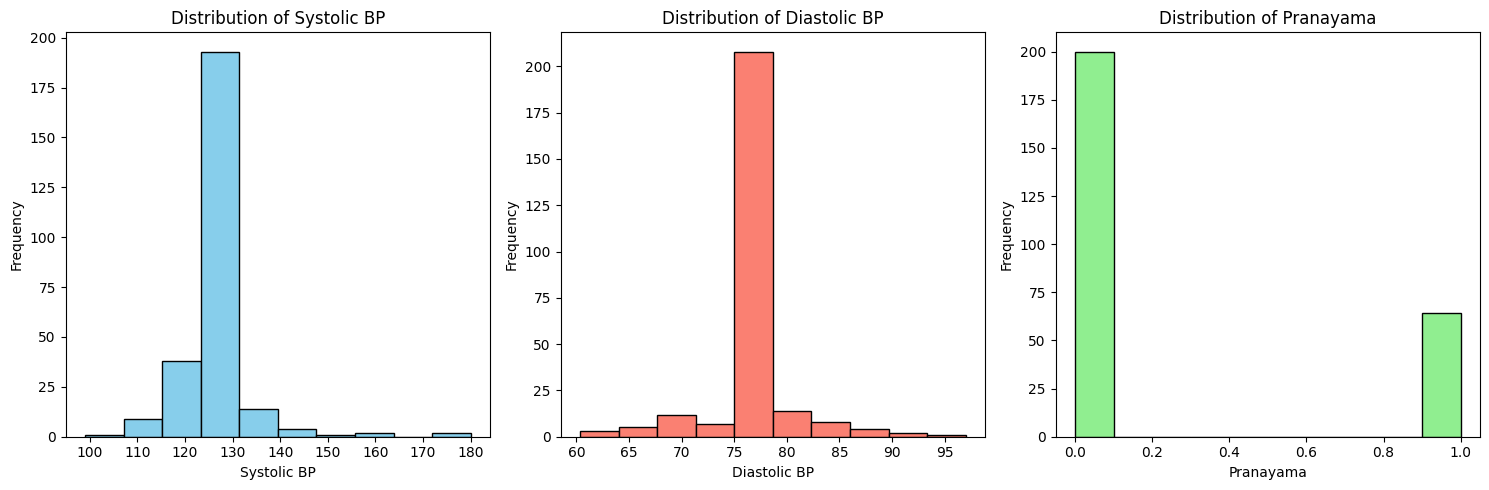

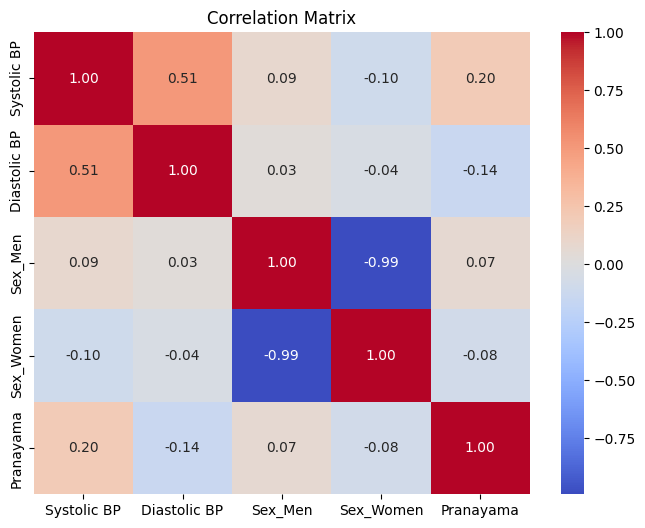

Systolic BP     0
Diastolic BP    0
Sex_Men         0
Sex_Women       0
Pranayama       0
dtype: int64


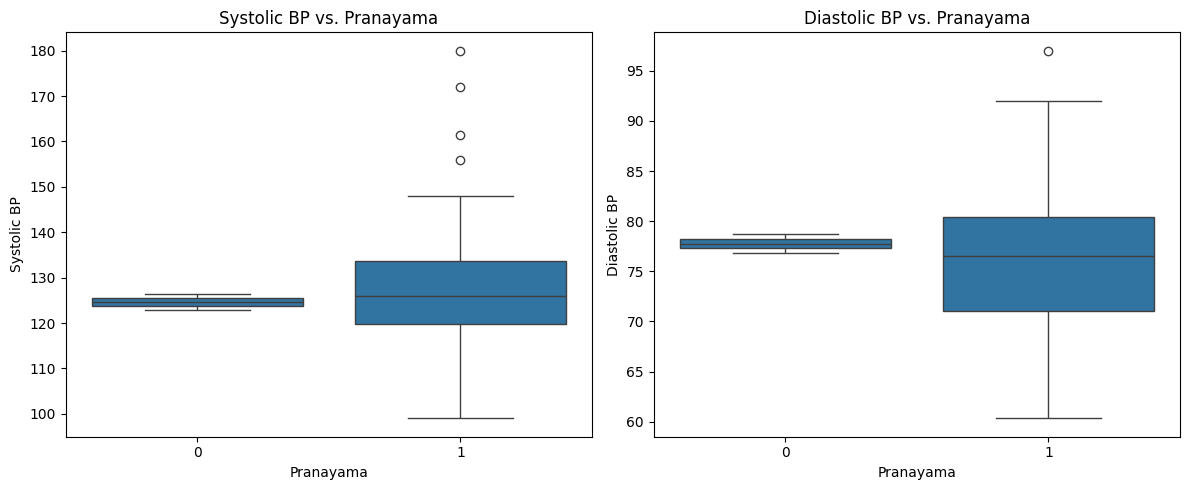

In [ ]:
# Display descriptive statistics
display(df.describe())

# Check data types
display(df.info())

# Visualize distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Systolic BP'], color='skyblue', edgecolor='black')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic BP')

plt.subplot(1, 3, 2)
plt.hist(df['Diastolic BP'], color='salmon', edgecolor='black')
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.title('Distribution of Diastolic BP')

plt.subplot(1, 3, 3)
plt.hist(df['Pranayama'], color='lightgreen', edgecolor='black')
plt.xlabel('Pranayama')
plt.ylabel('Frequency')
plt.title('Distribution of Pranayama')
plt.tight_layout()
plt.show()


# Calculate and visualize the correlation matrix
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Analyze the relationship between Pranayama and blood pressure
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Pranayama', y='Systolic BP', data=df)
plt.title('Systolic BP vs. Pranayama')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pranayama', y='Diastolic BP', data=df)
plt.title('Diastolic BP vs. Pranayama')

plt.tight_layout()
plt.show()

## **Data preparation**

Prepare the data for model training.Prepare the data for model training by handling missing values (if any), performing feature encoding, defining features (X) and target variables (Y), and applying data scaling.


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Handle Missing Values (not needed based on previous exploration)

# 2. Feature Encoding (already one-hot encoded)

# 3. Define Features (X) and Target Variables (Y)
X = df[['Sex_Men', 'Sex_Women', 'Pranayama']]
Y_sys = df['Systolic BP']
Y_dia = df['Diastolic BP']

# 4. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled.head())

,Sex_Men,Sex_Women,Pranayama
0,1.129541,-1.120897,-0.565685
1,-0.885316,0.892143,-0.565685
2,-0.885316,0.892143,1.767767
3,1.129541,-1.120897,1.767767
4,1.129541,-1.120897,1.767767


## **Data splitting**

 Split the data into training and testing sets using train_test_split.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for Systolic BP
X_train_sys, X_test_sys, Y_train_sys, Y_test_sys = train_test_split(
    X_scaled, Y_sys, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for Diastolic BP
X_train_dia, X_test_dia, Y_train_dia, Y_test_dia = train_test_split(
    X_scaled, Y_dia, test_size=0.2, random_state=42
)

## **Model training**

Train four different classification models: Logistic Regression, Random Forest, Support Vector Machine, and Naive Bayes to predict systolic and diastolic blood pressure.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

# Instantiate the models
linear_reg_model = LinearRegression()
rf_reg_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
gpr_model = GaussianProcessRegressor()

# Train the models for systolic blood pressure
linear_reg_model_sys = linear_reg_model.fit(X_train_sys, Y_train_sys)
rf_reg_model_sys = rf_reg_model.fit(X_train_sys, Y_train_sys)
svr_model_sys = svr_model.fit(X_train_sys, Y_train_sys)
gpr_model_sys = gpr_model.fit(X_train_sys, Y_train_sys)

# Train the models for diastolic blood pressure
linear_reg_model_dia = linear_reg_model.fit(X_train_dia, Y_train_dia)
rf_reg_model_dia = rf_reg_model.fit(X_train_dia, Y_train_dia)
svr_model_dia = svr_model.fit(X_train_dia, Y_train_dia)
gpr_model_dia = gpr_model.fit(X_train_dia, Y_train_dia)

## **Model evaluation**

Evaluate the performance of the trained regression models using R-squared, MSE, and RMSE, and print the results. Also calculate and print the training R-squared score for each model.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

models = {
    'Linear Regression': linear_reg_model_sys,
    'Random Forest': rf_reg_model_sys,
    'Support Vector Machine': svr_model_sys,
    'Gaussian Process': gpr_model_sys,
}

for name, model in models.items():
    y_pred = model.predict(X_test_sys)
    r2 = r2_score(Y_test_sys, y_pred)
    mse = mean_squared_error(Y_test_sys, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - Systolic BP - R2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print(f"{name} - Systolic BP - Training R2: {model.score(X_train_sys, Y_train_sys):.4f}")


models = {
    'Linear Regression': linear_reg_model_dia,
    'Random Forest': rf_reg_model_dia,
    'Support Vector Machine': svr_model_dia,
    'Gaussian Process': gpr_model_dia,
}

for name, model in models.items():
    y_pred = model.predict(X_test_dia)
    r2 = r2_score(Y_test_dia, y_pred)
    mse = mean_squared_error(Y_test_dia, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - Diastolic BP - R2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print(f"{name} - Diastolic BP - Training R2: {model.score(X_train_dia, Y_train_dia):.4f}")

Linear Regression - Systolic BP - R2: -30.8762, MSE: 2375.0240, RMSE: 48.7342
Linear Regression - Systolic BP - Training R2: -50.7018
Random Forest - Systolic BP - R2: -30.9841, MSE: 2383.0628, RMSE: 48.8166
Random Forest - Systolic BP - Training R2: -50.8295
Support Vector Machine - Systolic BP - R2: -30.7297, MSE: 2364.1029, RMSE: 48.6220
Support Vector Machine - Systolic BP - Training R2: -50.5470
Gaussian Process - Systolic BP - R2: -33.5485, MSE: 2574.1268, RMSE: 50.7359
Gaussian Process - Systolic BP - Training R2: -50.6874
Linear Regression - Diastolic BP - R2: 0.0425, MSE: 9.7537, RMSE: 3.1231
Linear Regression - Diastolic BP - Training R2: 0.0169
Random Forest - Diastolic BP - R2: 0.0594, MSE: 9.5813, RMSE: 3.0954
Random Forest - Diastolic BP - Training R2: 0.0193
Support Vector Machine - Diastolic BP - R2: -0.0262, MSE: 10.4535, RMSE: 3.2332
Support Vector Machine - Diastolic BP - Training R2: -0.0090
Gaussian Process - Diastolic BP - R2: -7.4017, MSE: 85.5846, RMSE: 9.2512
G

## **Model optimization**

Define the parameter grids for RandomForestRegressor for both systolic and diastolic blood pressure prediction and perform GridSearchCV to find the best hyperparameters. Then evaluate the best models on the test set.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV for systolic blood pressure
grid_search_sys = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid_rf,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)

# Fit GridSearchCV for systolic blood pressure
grid_search_sys.fit(X_train_sys, Y_train_sys)

# Initialize GridSearchCV for diastolic blood pressure
grid_search_dia = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid_rf,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)

# Fit GridSearchCV for diastolic blood pressure
grid_search_dia.fit(X_train_dia, Y_train_dia)


# Evaluate the best models
best_rf_sys = grid_search_sys.best_estimator_
best_rf_dia = grid_search_dia.best_estimator_

# Systolic BP evaluation
y_pred_sys = best_rf_sys.predict(X_test_sys)
r2_sys = r2_score(Y_test_sys, y_pred_sys)
mse_sys = mean_squared_error(Y_test_sys, y_pred_sys)
rmse_sys = np.sqrt(mse_sys)

# Diastolic BP evaluation
y_pred_dia = best_rf_dia.predict(X_test_dia)
r2_dia = r2_score(Y_test_dia, y_pred_dia)
mse_dia = mean_squared_error(Y_test_dia, y_pred_dia)
rmse_dia = np.sqrt(mse_dia)

print("Best hyperparameters for systolic blood pressure:", grid_search_sys.best_params_)
print(f"Systolic BP - R2: {r2_sys:.4f}, MSE: {mse_sys:.4f}, RMSE: {rmse_sys:.4f}")
print("Best hyperparameters for diastolic blood pressure:", grid_search_dia.best_params_)
print(f"Diastolic BP - R2: {r2_dia:.4f}, MSE: {mse_dia:.4f}, RMSE: {rmse_dia:.4f}")

Best hyperparameters for systolic blood pressure: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Systolic BP - R2: -0.0930, MSE: 81.4391, RMSE: 9.0244
Best hyperparameters for diastolic blood pressure: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Diastolic BP - R2: 0.0559, MSE: 9.6176, RMSE: 3.1012


## **Summary**:

Based on the analysis, pranayama's impact on blood pressure is **unclear**.  The models, even after hyperparameter tuning, demonstrated poor predictive ability for systolic blood pressure and only slightly better, but still limited, performance for diastolic blood pressure.  The provided data and models weren't sufficient to establish a clear link.


### Data Analysis Key Findings
* **Data Characteristics:** The dataset contained 264 entries with no missing values.  Features included 'Systolic BP', 'Diastolic BP', 'Sex' (one-hot encoded), and 'Pranayama'.
* **Model Performance (Initial):**  All initial regression models (Linear Regression, Random Forest, Support Vector Machine, Gaussian Process) showed poor predictive performance for systolic blood pressure, indicated by negative R-squared values.  The diastolic blood pressure predictions were slightly better, with Linear Regression and Random Forest exhibiting some positive R-squared values.
* **Model Performance (Optimized Random Forest):** After hyperparameter tuning, the Random Forest model still performed poorly on systolic blood pressure (negative R-squared), and only marginally better on diastolic blood pressure (low positive R-squared).  The best hyperparameters for both models were `{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}`.


### Insights or Next Steps
* **Explore alternative models:** Consider other regression models or more advanced techniques (e.g., neural networks) to improve predictive accuracy.
* **Feature engineering:** Investigate adding or transforming features to better capture the relationship between pranayama and blood pressure.  Consider adding interaction terms or polynomial features.


In [ ]:
mermaid
graph TD
    A[Start] --> B{Load Data};
    B --> C[Data Exploration];
    C --> D{Data Preparation};
    D --> E{Data Splitting};
    E --> F{Model Training (Initial)};
    F --> G{Model Evaluation (Initial)};
    G --> H{Model Optimization (Random Forest)};
    H --> I{Model Evaluation (Optimized)};
    I --> J[Summary and Conclusions];
    J --> K[End];